In [1]:
import tensorflow as tf

In [37]:
import numpy as np

In [2]:
mnist = tf.keras.datasets.mnist

In [15]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()  #unpacking dataset into training and test sets (x is data and y is label)
x_train = tf.keras.utils.normalize(x_train, axis = 1) # normalizing from 0-255 to 0-1
x_test = tf.keras.utils.normalize(x_test, axis = 1)

In [45]:
x_train.shape

(60000, 28, 28)

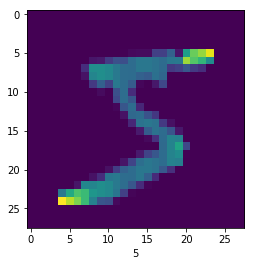

In [20]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.xlabel(y_train[0])
plt.show()

In [28]:
model = tf.keras.models.Sequential() # feed-forward neural net 
model

In [29]:
model.add(tf.keras.layers.Flatten()) ## input layer flattening the multi-dimension x_train into a 1-d array
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))#2 hidden layers with 128 nodes and act fn is rectified linear
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))# o/p layer where nodes equal to number of classes

In [46]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy']) 
                                        ## optimizer function, error measure and metrics
model.fit(x_train,y_train,epochs = 5)

Epoch 1/5
60000/60000 [==============================] - 3s 52us/step - loss: 0.0550 - acc: 0.9826
Epoch 2/5
60000/60000 [==============================] - 3s 47us/step - loss: 0.0393 - acc: 0.9872
Epoch 3/5
60000/60000 [==============================] - 3s 47us/step - loss: 0.0317 - acc: 0.9899
Epoch 4/5
60000/60000 [==============================] - 3s 46us/step - loss: 0.0248 - acc: 0.9917
Epoch 5/5
60000/60000 [==============================] - 3s 47us/step - loss: 0.0220 - acc: 0.9924


In [31]:
val_loss, val_val_acc = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 21us/step


In [47]:
print(val_loss, val_val_acc)

0.08651748946476728 0.9746


In [33]:
model.save('mnist_classification.model')

In [34]:
predictions = model.predict(x_test)


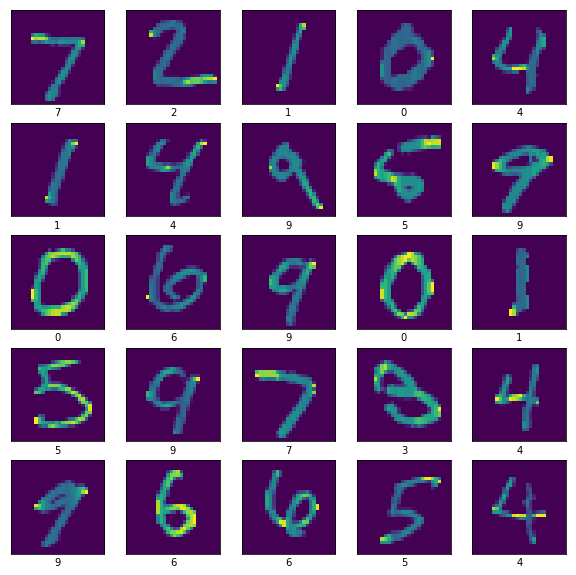

In [43]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])
    plt.xlabel(np.argmax(predictions[i]))